In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:

df_time = pd.read_csv('/home/mostafa2rz/Desktop/Tennis_project/202405/df_time.csv')
df_time

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp
0,12309599,1603.0,4335.0,NaN,NaN,NaN,1.714999e+09
1,12309091,1850.0,1475.0,NaN,NaN,NaN,1.715002e+09
2,12311405,2207.0,2326.0,NaN,NaN,NaN,1.715168e+09
3,12312010,3853.0,1937.0,NaN,NaN,NaN,1.715068e+09
4,12311158,2106.0,3548.0,NaN,NaN,NaN,1.715015e+09
...,...,...,...,...,...,...,...
19671,12312027,1439.0,3493.0,NaN,NaN,NaN,1.715077e+09
19672,12312113,2640.0,2514.0,NaN,NaN,NaN,1.715087e+09
19673,12310462,1699.0,2573.0,1690.0,NaN,NaN,1.714985e+09
19674,12309495,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
df_time = df_time.fillna(value=0)
df_time = df_time.drop_duplicates(subset='match_id')
df_time['total_peroid'] =  df_time['period_1']+ df_time['period_2']+ df_time['period_3']+ df_time['period_4']+ df_time['period_5']
df_time.sort_values(by='total_peroid')


,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp,total_peroid
10163,12346304,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0
2252,12374113,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0
7484,12373260,0.0,0.0,0.0,0.0,0.0,1.716890e+09,0.0
7477,12373023,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0
2258,12378587,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...
4907,12330588,67165.0,2282.0,68193.0,0.0,0.0,1.715618e+09,137640.0
2471,12357962,3511.0,75383.0,75981.0,0.0,0.0,1.716462e+09,154875.0
6162,12336297,3689.0,77846.0,81168.0,0.0,0.0,1.715833e+09,162703.0
6680,12300269,79778.0,82786.0,2474.0,0.0,0.0,1.714818e+09,165038.0


tarif va javab

In [197]:
match_time = df_time.groupby('match_id')['total_peroid'].max().reset_index()
#remove 0 match time values before get mean of that
match_time = match_time[match_time['total_peroid'] != 0]
match_time

,match_id,total_peroid
0,12260075,7318.0
1,12260076,7827.0
2,12260077,10346.0
3,12260078,7171.0
4,12260080,5382.0
...,...,...
9311,12384789,6819.0
9312,12384806,10098.0
9313,12384892,4063.0
9314,12384975,14067.0


In [198]:
match_time_Q3 = int(match_time['total_peroid'].quantile(0.75))
match_time_Q3

7858

In [199]:
match_time['distance_to_Q3'] = match_time['total_peroid'] - match_time_Q3
match_time

,match_id,total_peroid,distance_to_Q3
0,12260075,7318.0,-540.0
1,12260076,7827.0,-31.0
2,12260077,10346.0,2488.0
3,12260078,7171.0,-687.0
4,12260080,5382.0,-2476.0
...,...,...,...
9311,12384789,6819.0,-1039.0
9312,12384806,10098.0,2240.0
9313,12384892,4063.0,-3795.0
9314,12384975,14067.0,6209.0


In [200]:
long_match_time = match_time[match_time['distance_to_Q3']> 0]
long_match_time

,match_id,total_peroid,distance_to_Q3
2,12260077,10346.0,2488.0
11,12261532,10098.0,2240.0
12,12261565,11517.0,3659.0
14,12261593,8226.0,368.0
16,12261595,10105.0,2247.0
...,...,...,...
9306,12384491,8012.0,154.0
9308,12384512,8091.0,233.0
9312,12384806,10098.0,2240.0
9314,12384975,14067.0,6209.0


AS you can see above there are 1529 long match

In [201]:
#now we can see relation same rank player and this match
df_home_team_1 = pd.read_csv('/home/mostafa2rz/Desktop/Tennis_project/202405/df_home_team_1.csv').drop_duplicates(subset='match_id')
df_away_team_1 = pd.read_csv('/home/mostafa2rz/Desktop/Tennis_project/202405/df_away_team_1.csv').drop_duplicates(subset='match_id')
df_home_team_1 

,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
0,12309895,Smith A.,smith-alana,F,226,NaN,NaN,NaN,NaN,NaN,NaN,5893.0,45523.0,198254,409.0,SMI,USA,"Smith, Alana"
1,12311442,Militi Ribaldi A.,militi-ribaldi-andrea,M,147,NaN,NaN,NaN,NaN,NaN,NaN,347.0,4021.0,225278,1276.0,MIL,Italy,"Militi Ribaldi, Andrea"
2,12309595,Cirotte A.,cirotte-astrid,F,110,NaN,NaN,NaN,NaN,NaN,NaN,683.0,14810.0,362043,1228.0,CIR,France,"Cirotte, Astrid"
3,12305982,Schoolkate T.,schoolkate-tristan,M,947,Scarborough,Perth,1.83,78.0,right-handed,NaN,55333.0,255383.0,275471,187.0,SCH,Australia,"Schoolkate, Tristan"
4,12315996,Butvilas E.,butvilas-edas,M,555,NaN,Klaipeda,1.91,NaN,NaN,NaN,4596.0,22724.0,385592,532.0,BUT,Lithuania,"Butvilas, Edas"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12819,12276781,Rigele Te.,te-rigele,M,421,"Bejing, China","Huhehaote, China",1.88,80.0,right-handed,NaN,3753.0,117763.0,156664,575.0,RIG,China,"Te, Rigele"
12820,12295153,Palecek N.,palecek-nikol,F,86,NaN,NaN,NaN,NaN,NaN,NaN,1395.0,1855.0,368962,NaN,PAL,Serbia,"Palecek, Nikol"
12822,12293489,Toth A.,toth-amarissa-kiara,F,474,NaN,NaN,NaN,NaN,NaN,NaN,6864.0,48799.0,274685,406.0,TOT,Hungary,"Toth, Amarissa Kiara"
12824,12293463,Zusman R.,zusman-richard,M,56,NaN,New York,1.73,NaN,NaN,NaN,1843.0,6725.0,253327,1473.0,ZUS,USA,"Zusman, Richard"


In [202]:
df_long_match_time_with_player_rank =long_match_time.merge(df_home_team_1[['match_id','current_rank']], on='match_id',how='left').rename(columns={'current_rank': 'home_player_rank'})
df_long_match_time_with_player_rank = df_long_match_time_with_player_rank.merge(df_away_team_1[['match_id','current_rank']], on='match_id',how='left').rename(columns={'current_rank': 'away_player_rank'})
df_long_match_time_with_player_rank

,match_id,total_peroid,distance_to_Q3,home_player_rank,away_player_rank
0,12260077,10346.0,2488.0,39.0,3.0
1,12261532,10098.0,2240.0,20.0,6.0
2,12261565,11517.0,3659.0,1.0,2.0
3,12261593,8226.0,368.0,4.0,2.0
4,12261595,10105.0,2247.0,37.0,4.0
...,...,...,...,...,...
1524,12384491,8012.0,154.0,806.0,650.0
1525,12384512,8091.0,233.0,356.0,448.0
1526,12384806,10098.0,2240.0,264.0,385.0
1527,12384975,14067.0,6209.0,344.0,200.0


In [203]:
df_long_match_time_with_player_rank['rank_distance']=abs(df_long_match_time_with_player_rank['home_player_rank']- df_long_match_time_with_player_rank['away_player_rank'])
df_long_match_time_with_player_rank

,match_id,total_peroid,distance_to_Q3,home_player_rank,away_player_rank,rank_distance
0,12260077,10346.0,2488.0,39.0,3.0,36.0
1,12261532,10098.0,2240.0,20.0,6.0,14.0
2,12261565,11517.0,3659.0,1.0,2.0,1.0
3,12261593,8226.0,368.0,4.0,2.0,2.0
4,12261595,10105.0,2247.0,37.0,4.0,33.0
...,...,...,...,...,...,...
1524,12384491,8012.0,154.0,806.0,650.0,156.0
1525,12384512,8091.0,233.0,356.0,448.0,92.0
1526,12384806,10098.0,2240.0,264.0,385.0,121.0
1527,12384975,14067.0,6209.0,344.0,200.0,144.0


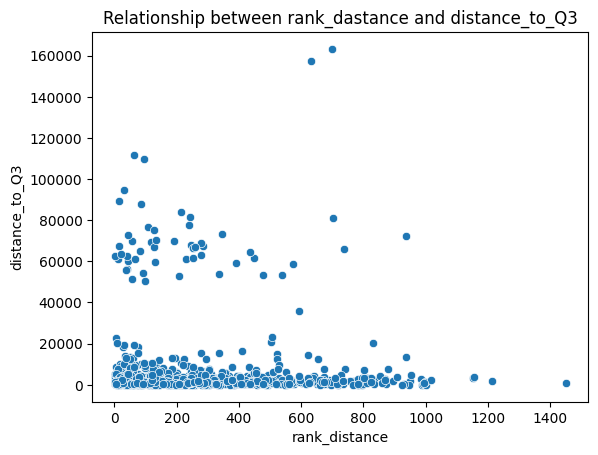

In [204]:
sns.scatterplot(x='rank_distance', y='distance_to_Q3', data=df_long_match_time_with_player_rank)
plt.title('Relationship between rank_dastance and distance_to_Q3')
plt.show()

As you can see, most of these long games are in a small rank difference between the players
،And the more the rank difference increases, the less the race is longed

There is a large density of data in the rank difference range of 200 and we can save that

In [205]:
#save df_200_rank_distance 
df_200_rank_distance = df_long_match_time_with_player_rank[df_long_match_time_with_player_rank['rank_distance']<=200]
df_200_rank_distance.to_csv('df_200_rank_distance.csv')

In [206]:
df_200_rank_distance

,match_id,total_peroid,distance_to_Q3,home_player_rank,away_player_rank,rank_distance
0,12260077,10346.0,2488.0,39.0,3.0,36.0
1,12261532,10098.0,2240.0,20.0,6.0,14.0
2,12261565,11517.0,3659.0,1.0,2.0,1.0
3,12261593,8226.0,368.0,4.0,2.0,2.0
4,12261595,10105.0,2247.0,37.0,4.0,33.0
...,...,...,...,...,...,...
1524,12384491,8012.0,154.0,806.0,650.0,156.0
1525,12384512,8091.0,233.0,356.0,448.0,92.0
1526,12384806,10098.0,2240.0,264.0,385.0,121.0
1527,12384975,14067.0,6209.0,344.0,200.0,144.0


In [207]:
len(df_200_rank_distance)/len(df_long_match_time_with_player_rank)*100

49.57488554610857

About 50% of these long matches were related to the 200 rank difference

In [208]:
mean_match_time_of_200_rank_player_distance = int(df_200_rank_distance['total_peroid'].mean())
mean_match_time_of_200_rank_player_distance

12629

In [212]:
#compare all match time and 200 rank player distance
((mean_match_time_of_200_rank_player_distance / int(match_time['total_peroid'].mean()))-1)*100

72.12757257734769

mean of this player match time 72% more than all players match time

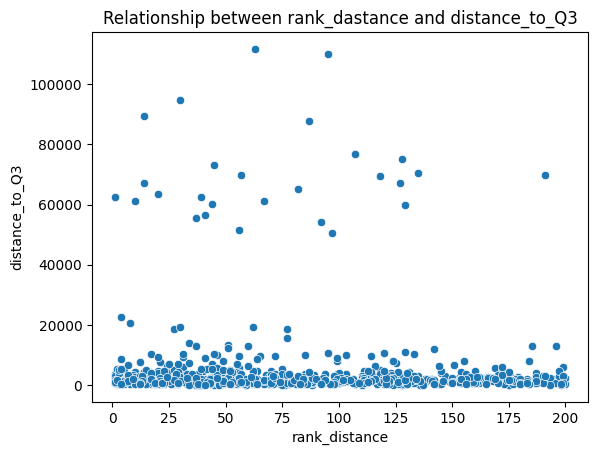

In [209]:
sns.scatterplot(x='rank_distance', y='distance_to_Q3', data=df_200_rank_distance)
plt.title('Relationship between rank_dastance and distance_to_Q3')
plt.show()